In [2]:
import pandas as pd

data = pd.read_excel('/kaggle/input/insurance-policies/insurance_policies_data.xlsx')

data.head(10)


,ID,BirthDate,Car Color,Car Make,Car Model,Car Use,Car Year,Coverage Zone,Education,Gender,Marital Status,Parent,Claim Amount,Claim Freq,Household Income,Kids Driving
0,62-2999778,1965-08-09,Green,Acura,TSX,Private,2017,Highly Urban,High School,Male,Single,Yes,7375.988,1,220436.66,2
1,70-2426103,1991-04-21,Turquoise,Corbin,Sparrow,Private,2011,Urban,Bachelors,Female,Married,No,7897.541,1,66491.43,0
2,08-3808219,2002-03-08,Orange,Nissan,Pathfinder,Private,2000,Rural,Bachelors,Male,Divorced,No,3090.401,0,56122.70,0
3,38-0306843,1962-05-10,Pink,Ford,Econoline E350,Private,2007,Highly Urban,Bachelors,Female,Single,No,3025.782,1,175182.61,0
4,47-5163637,1995-01-15,Green,Nissan,350Z,Commercial,2013,Rural,Masters,Male,Single,No,5043.402,3,137110.23,0
5,07-4760971,1966-11-06,Maroon,Mercedes-Benz,CLK-Class,Private,2006,Rural,PhD,Male,Single,Yes,7193.514,3,212072.46,1
6,36-8207139,2002-08-27,Yellow,Toyota,Matrix,Private,2013,Rural,High School,Male,Single,No,2161.115,0,87875.66,0
7,57-6123340,1983-02-26,Crimson,Lincoln,Continental Mark VII,Private,1996,Highly Rural,Bachelors,Male,Married,No,2444.774,2,167681.37,0
8,47-9063798,1953-10-06,Goldenrod,Mazda,323,Private,2002,Rural,High School,Male,Single,Yes,4043.712,0,116304.98,2
9,92-8406214,1995-12-18,Red,Ford,F350,Private,2001,Suburban,High School,Female,Single,No,3211.983,0,111742.45,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37542 entries, 0 to 37541
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                37542 non-null  object        
 1   BirthDate         37542 non-null  datetime64[ns]
 2   Car Color         37542 non-null  object        
 3   Car Make          37542 non-null  object        
 4   Car Model         37542 non-null  object        
 5   Car Use           37542 non-null  object        
 6   Car Year          37542 non-null  int64         
 7   Coverage Zone     37542 non-null  object        
 8   Education         37542 non-null  object        
 9   Gender            37542 non-null  object        
 10  Marital Status    37542 non-null  object        
 11  Parent            37542 non-null  object        
 12  Claim Amount      37542 non-null  float64       
 13  Claim Freq        37542 non-null  int64         
 14  Household Income  3754

In [4]:
data.isna().sum()


ID                  0
BirthDate           0
Car Color           0
Car Make            0
Car Model           0
Car Use             0
Car Year            0
Coverage Zone       0
Education           0
Gender              0
Marital Status      0
Parent              0
Claim Amount        0
Claim Freq          0
Household Income    0
Kids Driving        0
dtype: int64

In [5]:
data.describe()


,BirthDate,Car Year,Claim Amount,Claim Freq,Household Income,Kids Driving
count,37542,37542.000000,37542.000000,37542.000000,37542.000000,37542.000000
mean,1979-05-07 10:05:32.555537856,2007.293005,5002.851410,0.510308,147247.407750,0.418278
min,1952-10-21 00:00:00,1916.000000,0.004000,0.000000,45004.910000,0.000000
25%,1966-01-25 00:00:00,2002.000000,2543.940750,0.000000,96162.182500,0.000000
50%,1979-04-21 00:00:00,2009.000000,4945.589000,0.000000,146674.895000,0.000000
75%,1992-07-26 00:00:00,2014.000000,7497.492750,1.000000,198277.420000,1.000000
max,2005-10-18 00:00:00,2020.000000,9999.770000,4.000000,249991.110000,3.000000
std,NaN,9.045441,2870.651799,1.015050,59145.588886,0.736958


In [6]:
data.columns


Index(['ID', 'BirthDate', 'Car Color', 'Car Make', 'Car Model', 'Car Use',
       'Car Year', 'Coverage Zone', 'Education', 'Gender', 'Marital Status',
       'Parent', 'Claim Amount', 'Claim Freq', 'Household Income',
       'Kids Driving'],
      dtype='object')

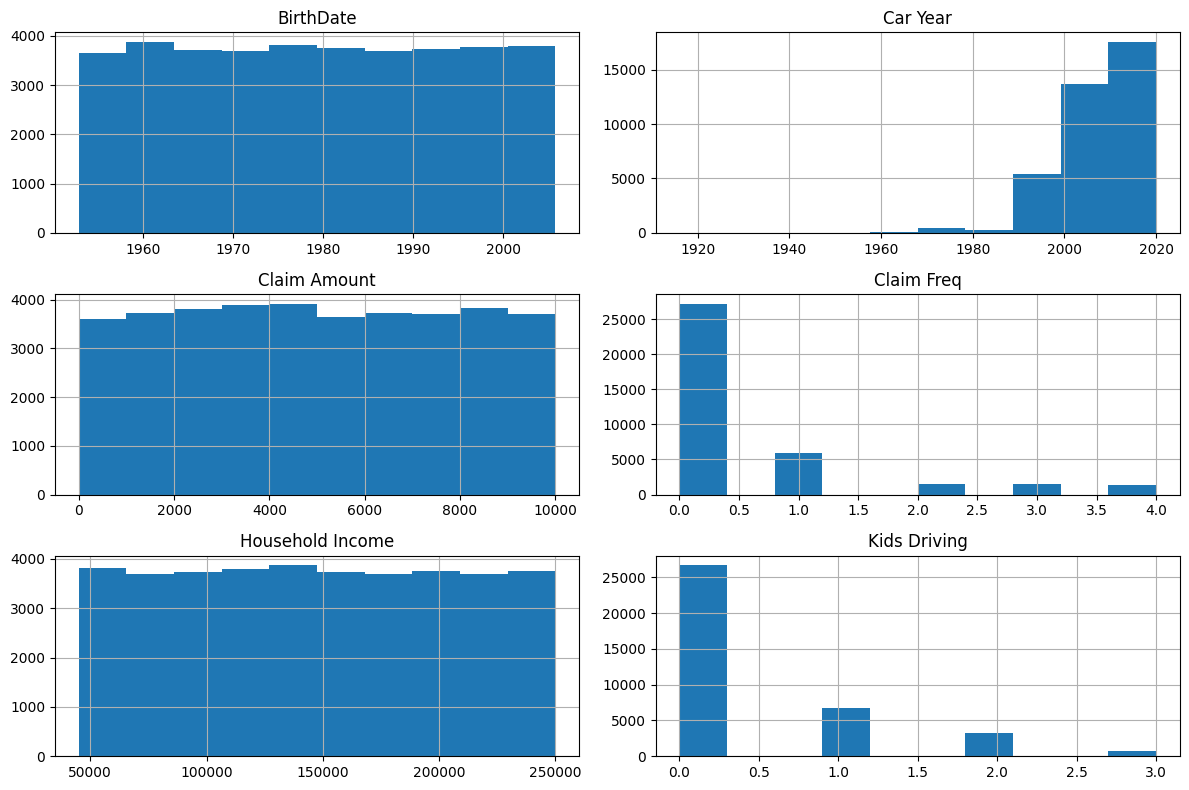

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


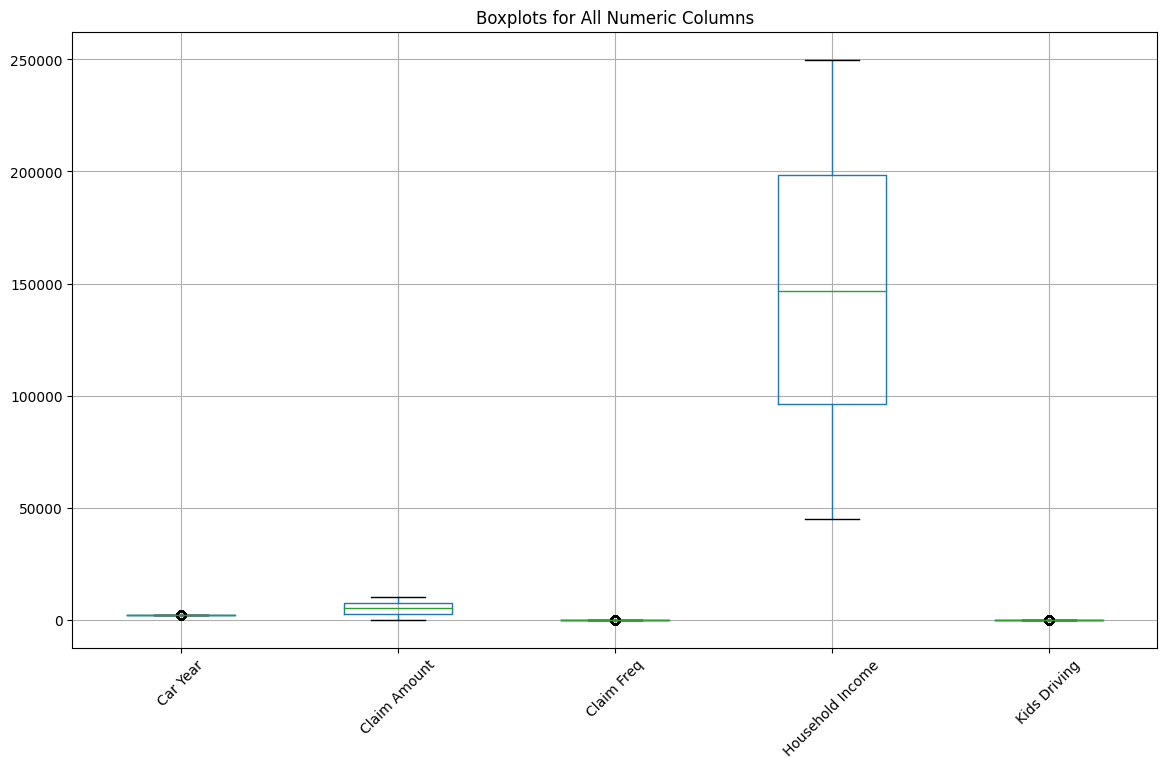

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data.select_dtypes(include='number').columns

plt.figure(figsize=(14, 8))
data[numeric_cols].boxplot()
plt.title('Boxplots for All Numeric Columns')
plt.xticks(rotation=45)
plt.show()


In [12]:
categorical_cols = [
    "Car Color", "Car Make", "Car Model", "Car Use", 
    "Coverage Zone", "Education", "Gender", 
    "Marital Status", "Parent"
]

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("عدد الفئات:", data[col].nunique())
    print("الفئات:")
    print(data[col].unique())



Column: Car Color
عدد الفئات: 19
الفئات:
['Green' 'Turquoise' 'Orange' 'Pink' 'Maroon' 'Yellow' 'Crimson'
 'Goldenrod' 'Red' 'Fuscia' 'Aquamarine' 'Mauv' 'Blue' 'Teal' 'Indigo'
 'Puce' 'Violet' 'Purple' 'Khaki']

Column: Car Make
عدد الفئات: 78
الفئات:
['Acura' 'Corbin' 'Nissan' 'Ford' 'Mercedes-Benz' 'Toyota' 'Lincoln'
 'Mazda' 'Chevrolet' 'Eagle' 'Oldsmobile' 'Volvo' 'Suzuki' 'Porsche'
 'Infiniti' 'Subaru' 'GMC' 'BMW' 'Chrysler' 'Dodge' 'Honda' 'Volkswagen'
 'MINI' 'Lexus' 'Kia' 'Audi' 'Pontiac' 'Bentley' 'Saab' 'Merkur' 'Jeep'
 'Austin' 'Buick' 'Hummer' 'Lamborghini' 'Mitsubishi' 'Mercury' 'Cadillac'
 'Isuzu' 'Saturn' 'Lotus' 'Hyundai' 'Rolls-Royce' 'Scion' 'Daewoo'
 'Plymouth' 'Jaguar' 'Land Rover' 'Holden' 'Rambler' 'Ferrari' 'Spyker'
 'Aston Martin' 'Maserati' 'Alfa Romeo' 'Smart' 'Ram' 'Aptera' 'Fiat'
 'Daihatsu' 'Maybach' 'Morgan' 'McLaren' 'Peugeot' 'Hillman' 'Foose' 'Geo'
 'Panoz' 'Jensen' 'Studebaker' 'Citroën' 'Tesla' 'MG' 'Shelby' 'Bugatti'
 'Fillmore' 'Renault' 'Fairthor